In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# This function calculates the rise and fall time
def find_mintime_halfmag(y_vals, x_vals): 
    minmag = np.min(y_vals)
    magdiff = 2.5 * np.log10(2)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index], minmag + magdiff

# This function calculates the rise and fall time
def find_rise_fall(x_interp, y_interp, halfmag, mintime):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - halfmag) < 0.05:
            good_xvals = np.append(good_xvals, xval)

    half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

    return mintime - half_rising_JD, half_falling_JD - mintime

def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    y_error = np.array(y_error)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)

    order = np.argsort(x_vals)
    zero = np.zeros(1)
    y_error = np.append(y_error, zero)
    
    
    return x_vals[order], y_vals[order], y_error[order]


In [8]:
CV_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abppewc_20220603\\detections_ZTF19abppewc.csv")
plotname = CV_1
plotname

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,ztf,58709.215856,955215850615015006,2,955215850615,19.737877,1,955,11.847463,19.897790,...,19.9663,0.7133,593120206.0,False,False,False,NaN,bulk_1.0.0,0,956194440615015000
1,ztf,58709.246123,955246120615015012,1,955246120615,19.458800,1,955,11.658500,19.778700,...,19.9987,0.8355,NaN,False,False,False,NaN,bulk_1.0.0,0,956194440615015000
2,ztf,58710.168970,956168960615015002,2,956168960615,19.298866,1,956,11.649467,18.997744,...,18.8623,0.3322,593120206.0,False,False,False,NaN,bulk_1.0.0,0,956194440615015000
3,ztf,58710.194444,956194440615015005,1,956194440615,19.009205,1,956,11.666139,18.530201,...,18.3720,0.2175,593120106.0,False,False,False,NaN,bulk_1.0.0,0,961278580615015000
4,ztf,58711.168750,957168740615015008,2,957168740615,19.441065,1,957,11.846894,19.055970,...,19.1364,0.3899,593120206.0,False,False,False,NaN,bulk_1.0.0,0,961278580615015000
5,ztf,58713.168599,959168590615015066,2,959168590615,19.328600,1,959,11.699500,19.419100,...,18.9886,0.3710,NaN,False,False,False,NaN,bulk_1.0.0,0,961278580615015000
6,ztf,58714.168912,960168910615015012,2,960168910615,20.524162,1,960,11.789158,19.458410,...,19.3091,0.1817,593120206.0,False,False,False,NaN,bulk_1.0.0,0,961278580615015000
7,ztf,58714.194398,960194390615015018,1,960194390615,20.113934,1,960,11.689789,19.278236,...,19.4198,0.2097,593120106.0,False,False,False,NaN,bulk_1.0.0,0,961278580615015000
8,ztf,58715.252083,961252080615015012,2,961252080615,20.246613,1,961,11.931462,19.559500,...,19.2739,0.2152,593120206.0,False,False,False,NaN,bulk_1.0.0,0,961278580615015000
9,ztf,58715.278588,961278580615015016,1,961278580615,20.259441,1,961,11.775654,19.331554,...,19.1966,0.1955,593120106.0,False,False,False,NaN,bulk_1.0.0,0,971250940615015000


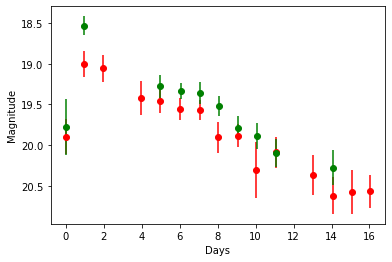

In [9]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

15
15
minmag 18.997744
halfmag 19.750318989159954
minmag 18.530201
halfmag 19.282775989159955


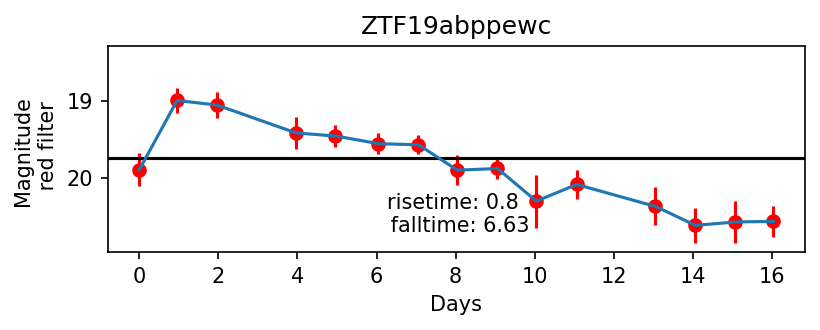

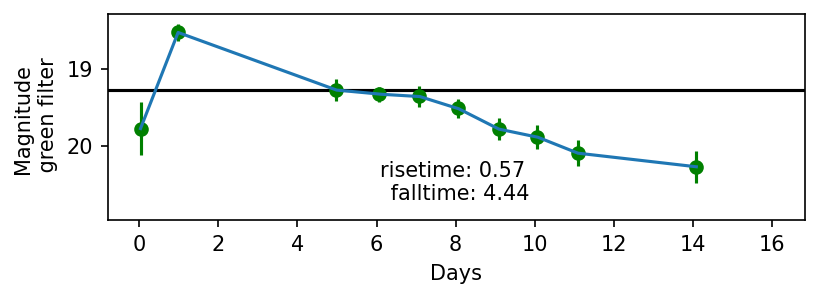

In [10]:
# red filter for CV 1

plotname = CV_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]
print(len(x_vals))
print(len(y_vals))
# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abppewc')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n green filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [16]:
CV_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acswirx_20220606\\detections_ZTF18acswirx.csv")
plotname = CV_2

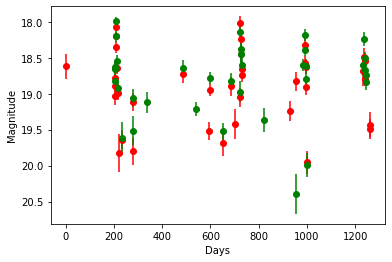

In [17]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.326502
halfmag 19.079076989159955
minmag 18.184113
halfmag 18.936687989159953


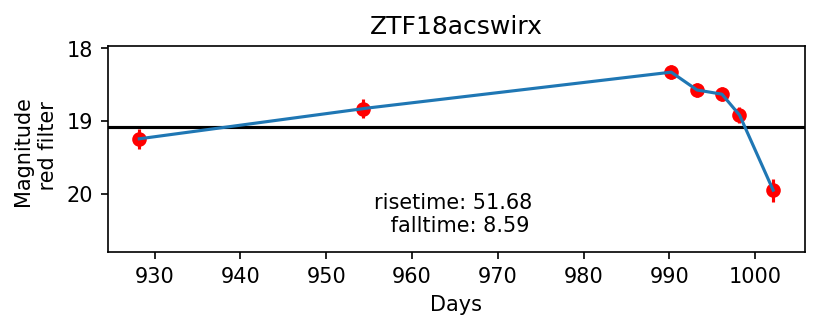

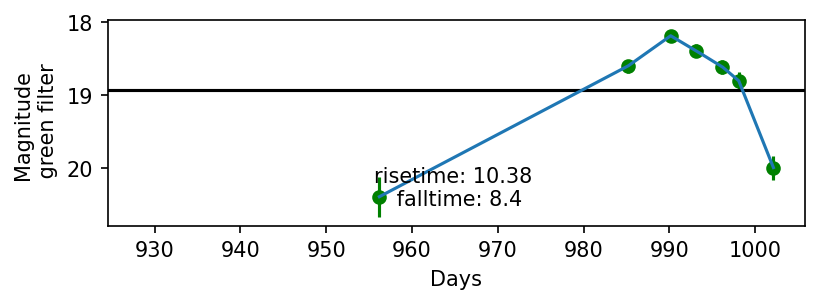

In [18]:
# red filter for CV 2

plotname = CV_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 25
finish = 32
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acswirx')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 22
finish = 29
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n green filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)

ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [19]:
CV_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19aaqstxo_20220606\\detections_ZTF19aaqstxo.csv")
plotname = CV_3

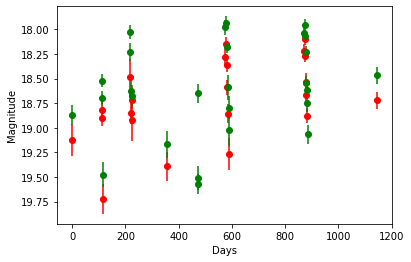

In [20]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.143967
halfmag 18.896541989159953
minmag 17.935453
halfmag 18.688027989159952


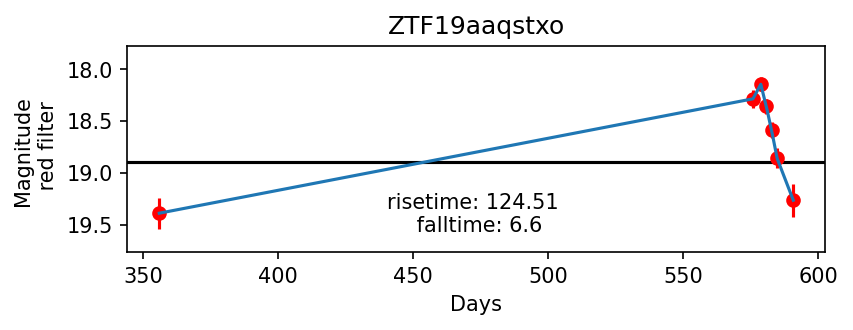

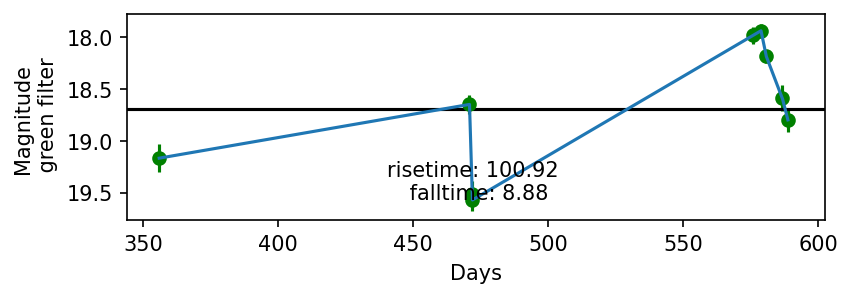

In [21]:
# red filter for CV 3

plotname = CV_3

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 8
finish = 15
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19aaqstxo')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 8
finish = 17
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [22]:
CV_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abzcokk_20220606\\detections_ZTF20abzcokk.csv")
plotname = CV_4

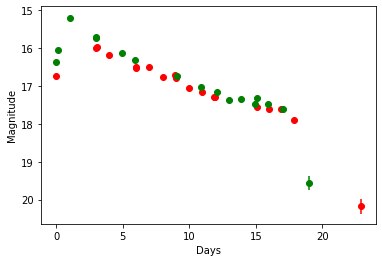

In [23]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 15.974818
halfmag 16.727392989159952
minmag 15.189616
halfmag 15.942190989159952


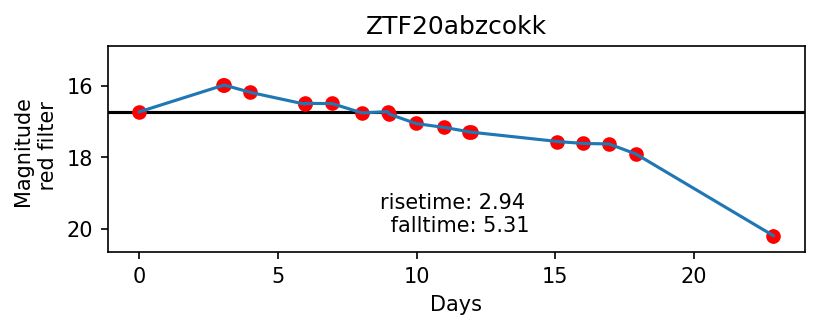

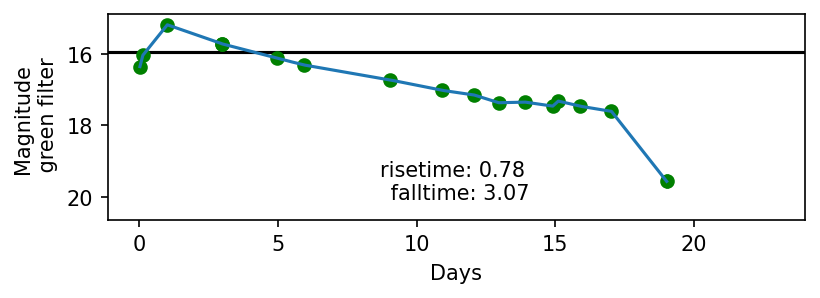

In [25]:
# red filter for CV 4

plotname = CV_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abzcokk')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [26]:
CV_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acaohjl_20220606\\detections_ZTF21acaohjl.csv")
plotname = CV_5

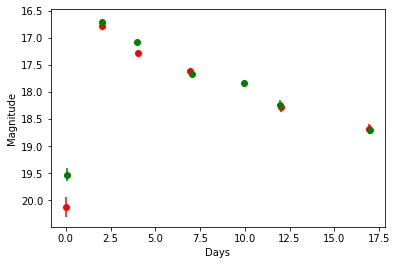

In [27]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.780235
halfmag 17.532809989159954
minmag 16.698427
halfmag 17.451001989159952


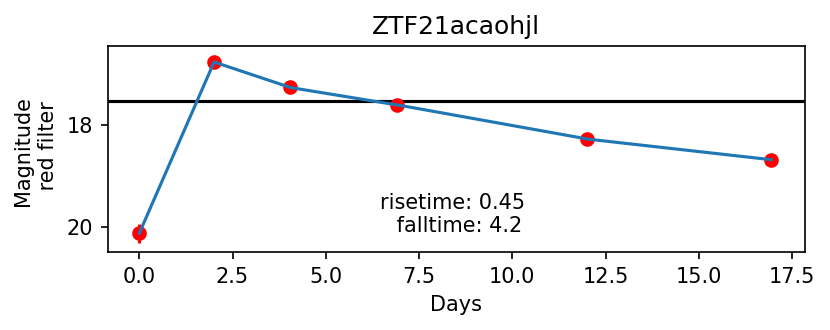

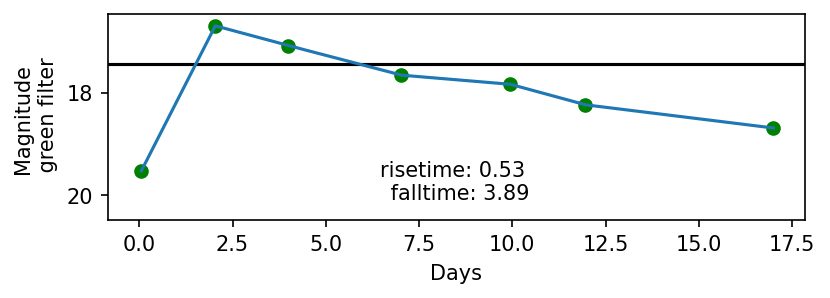

In [28]:
# red filter for CV 5

plotname = CV_5

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acaohjl')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [31]:
CV_6 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abbxnbm_20220606\\detections_ZTF21abbxnbm.csv")
plotname = CV_6

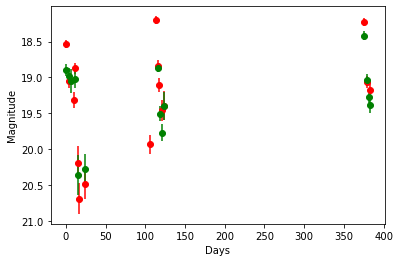

In [32]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.229588
halfmag 18.982162989159953
minmag 18.416746
halfmag 19.169320989159953


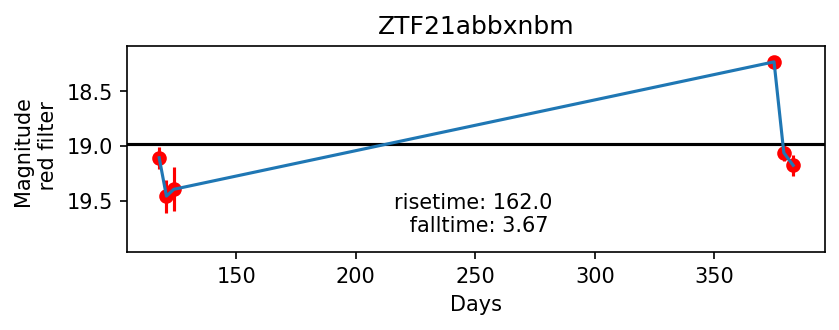

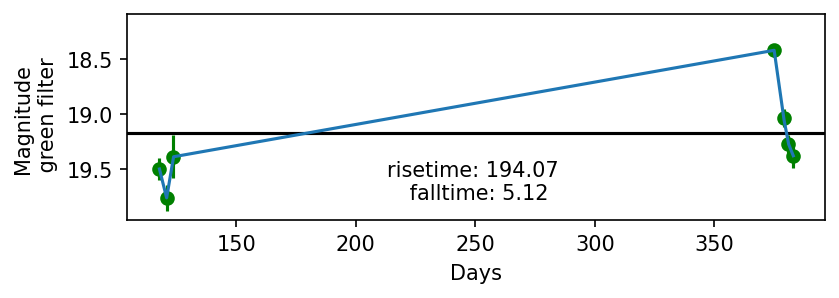

In [33]:
# red filter for CV 6

plotname = CV_6

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 10
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abbxnbm')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 7
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [34]:
CV_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aawbodq_20220606\\detections_ZTF20aawbodq.csv")
plotname = CV_7

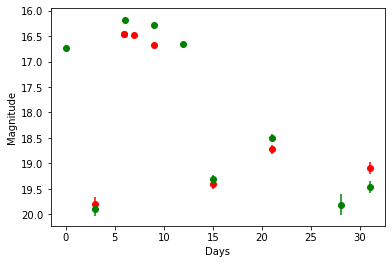

In [35]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.462772
halfmag 17.215346989159954
minmag 16.182114
halfmag 16.93468898915995


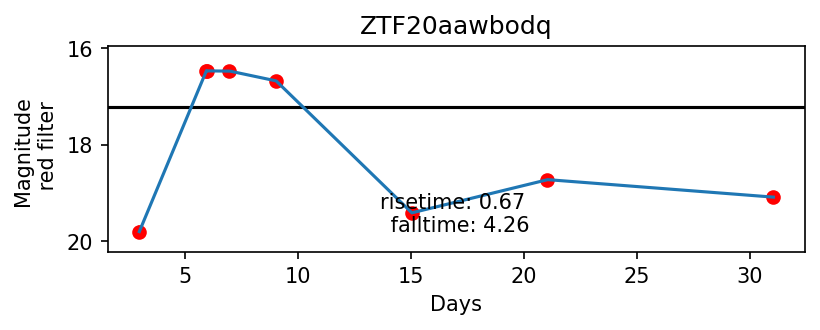

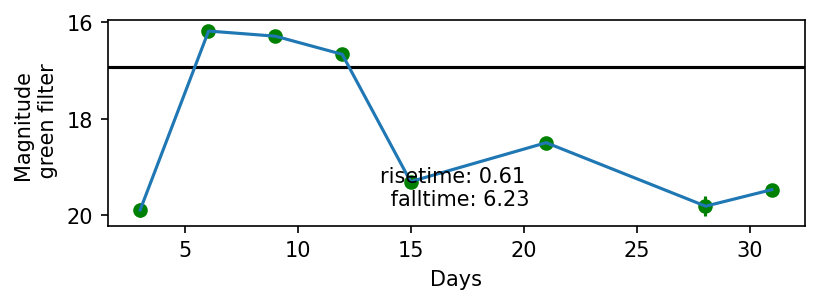

In [36]:
# red filter for CV 7

plotname = CV_7

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aawbodq')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 1
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [38]:
CV_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19achbhfc_20220606\\detections_ZTF19achbhfc.csv")
plotname = CV_8

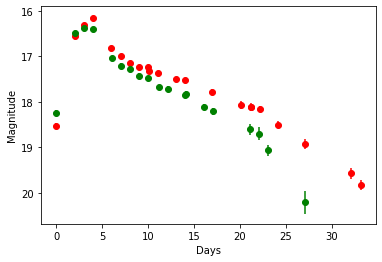

In [39]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.154366
halfmag 16.906940989159953
minmag 16.384924
halfmag 17.137498989159955


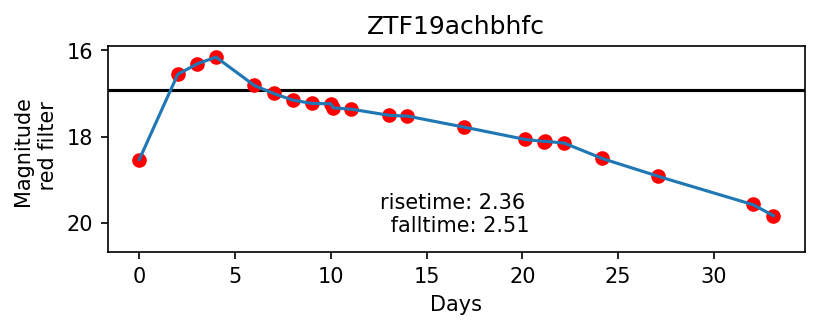

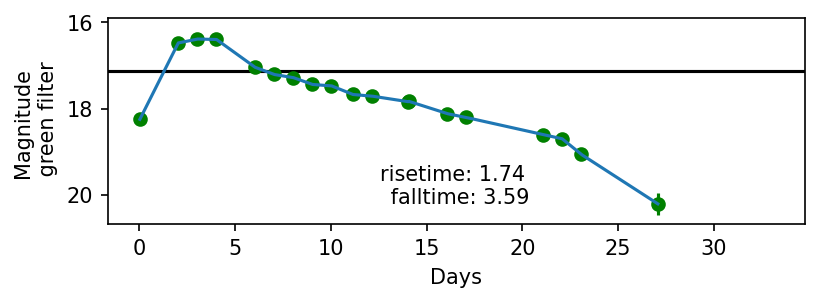

In [40]:
# red filter for CV 8

plotname = CV_8

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19achbhfc')

# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)
#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [41]:
CV_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abzipjc_20220606\\detections_ZTF19abzipjc.csv")
plotname = CV_9

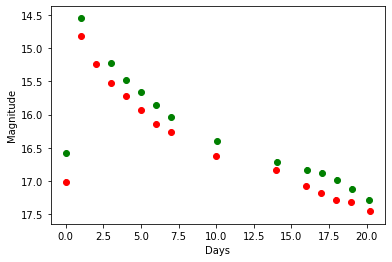

In [42]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 14.81506
halfmag 15.567634989159954
minmag 14.539643
halfmag 15.292217989159953


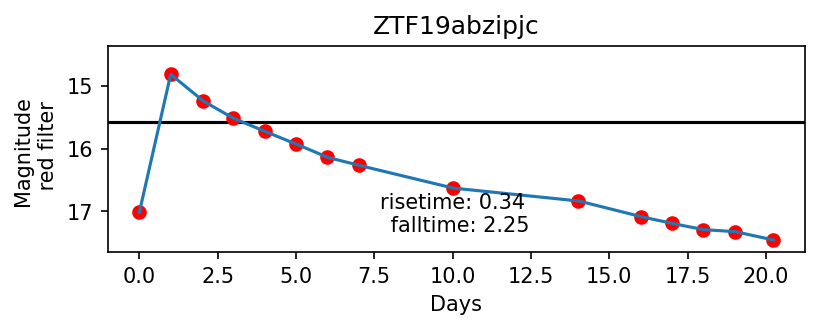

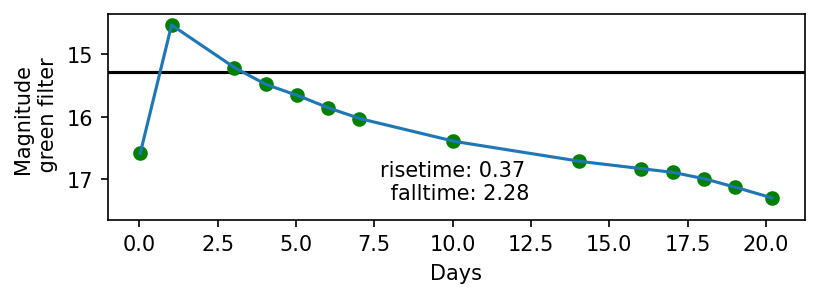

In [43]:
# red filter for CV 9

plotname = CV_9

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abzipjc')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [44]:
CV_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abyrano_20220606\\detections_ZTF19abyrano.csv")
plotname = CV_10

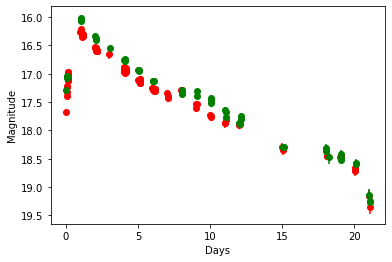

In [45]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.2125
halfmag 16.96507498915995
minmag 16.007322
halfmag 16.75989698915995


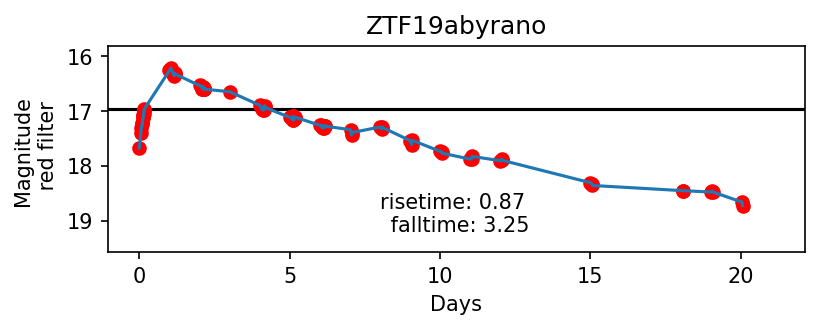

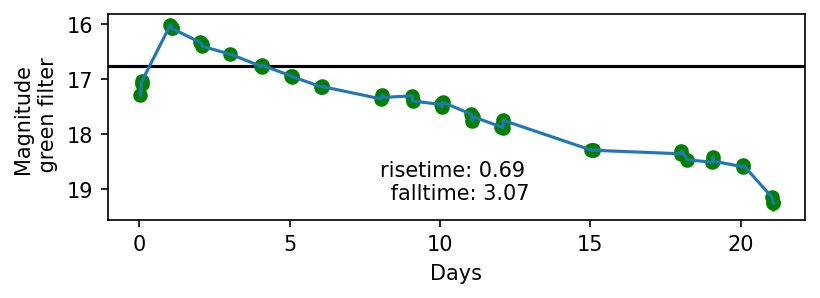

In [46]:
# red filter for CV 10

plotname = CV_10

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abyrano')


# green filter for CV 1
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [47]:
CV_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aahnvmo_20220616\\detections_ZTF22aahnvmo.csv")
plotname = CV_11

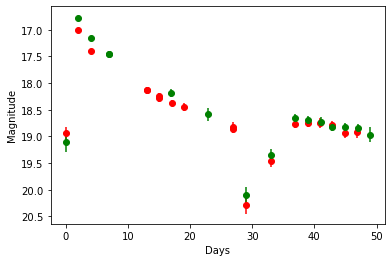

In [48]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.009974
halfmag 17.762548989159953
minmag 16.773073
halfmag 17.525647989159953


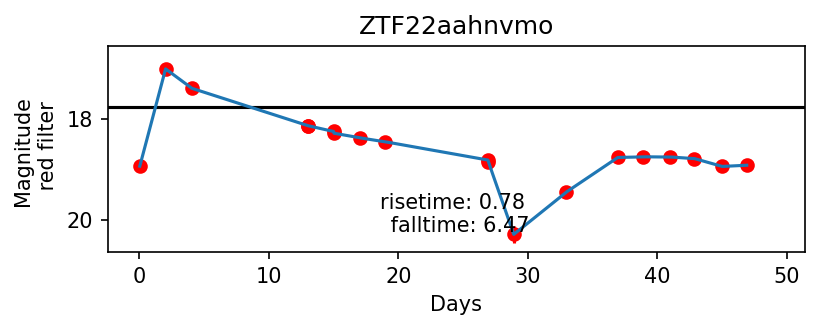

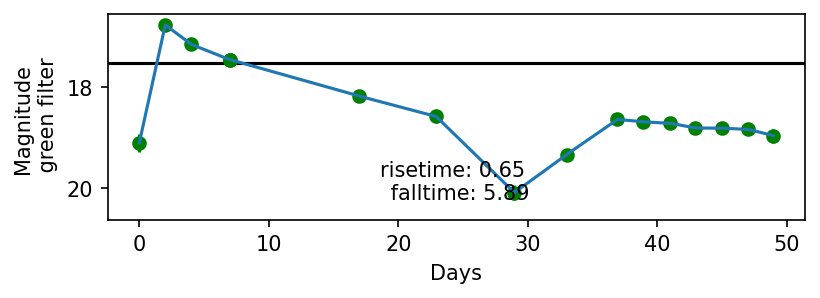

In [49]:
# red filter for CV 11

plotname = CV_11

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aahnvmo')


# green filter for CV 11
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [50]:
CV_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aakzsrj_20220616\\detections_ZTF22aakzsrj.csv")
plotname = CV_12

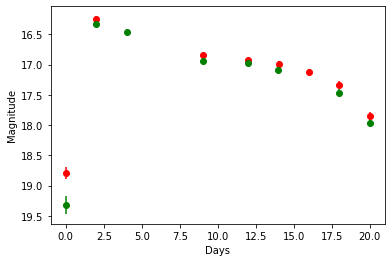

In [51]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.248594
halfmag 17.001168989159954
minmag 16.3238
halfmag 17.07637498915995


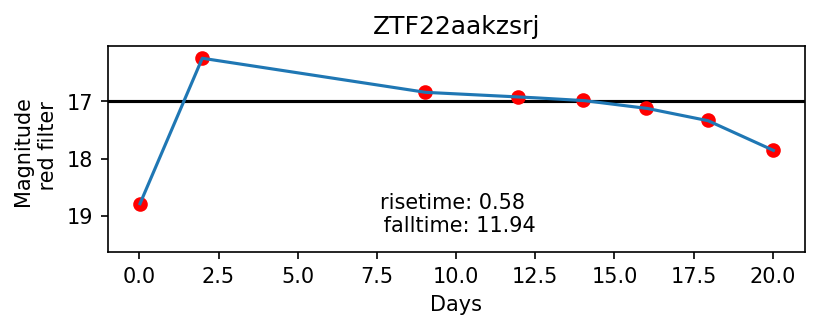

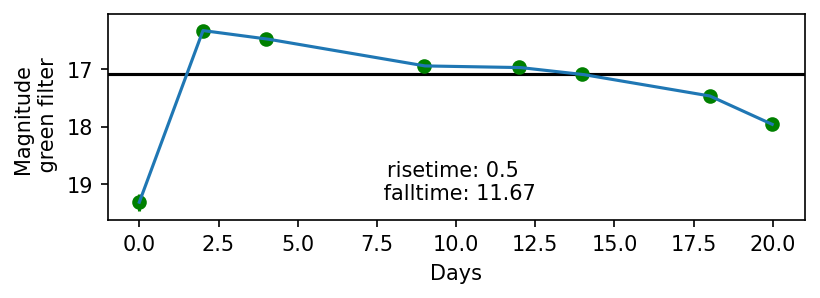

In [52]:
# red filter for CV 12

plotname = CV_12

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aakzsrj')


# green filter for CV 12
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [53]:
CV_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21accyuff_20220616\\detections_ZTF21accyuff.csv")
plotname = CV_13

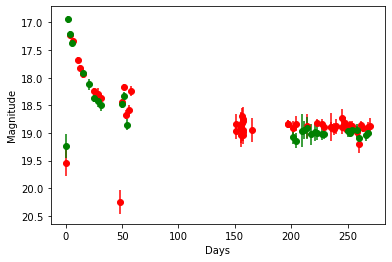

In [54]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.219593
halfmag 17.972167989159953
minmag 16.945642
halfmag 17.698216989159953


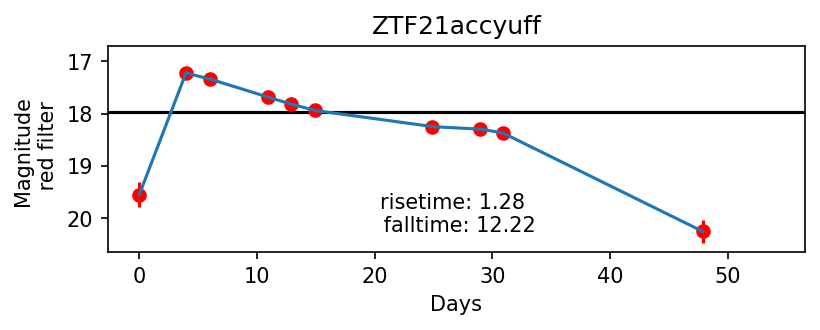

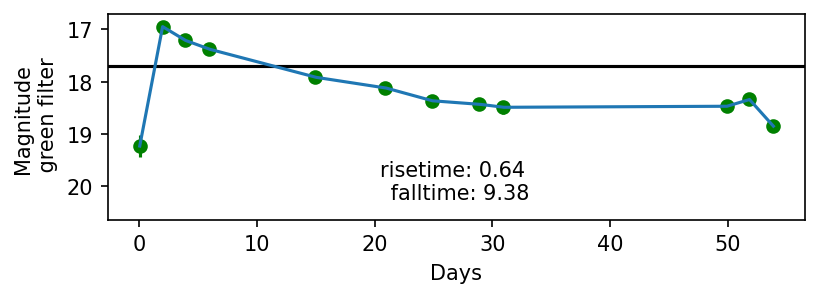

In [55]:
# red filter for CV 13

plotname = CV_13

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 10
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21accyuff')


# green filter for CV 13
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 12
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [56]:
CV_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazmjby_20220616\\detections_ZTF21aazmjby.csv")
plotname = CV_14

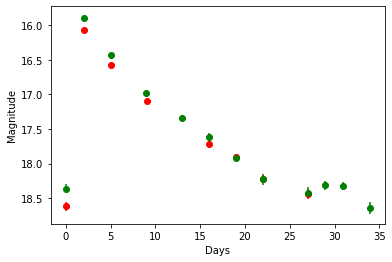

In [57]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.072609
halfmag 16.825183989159953
minmag 15.899458
halfmag 16.652032989159952


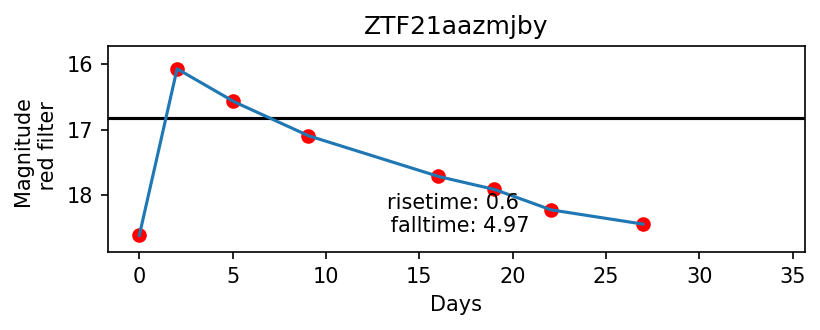

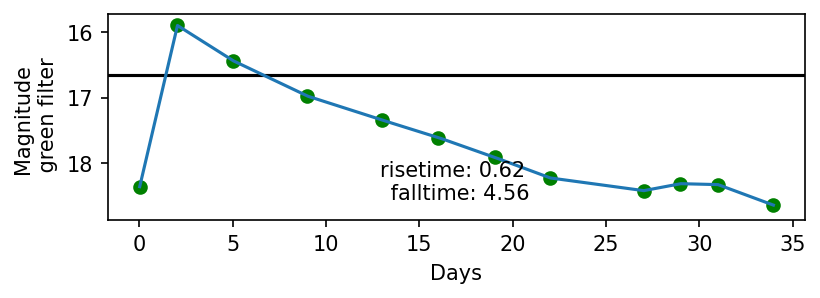

In [58]:
# red filter for CV 14

plotname = CV_14

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aazmjby')


# green filter for CV 14
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [59]:
CV_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18absnibc_20220616\\detections_ZTF18absnibc.csv")
plotname = CV_15

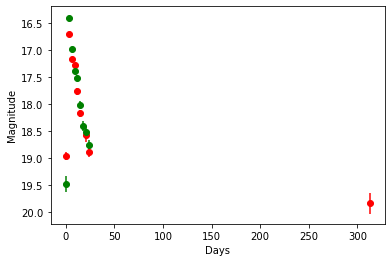

In [60]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.69992
halfmag 17.452494989159952
minmag 16.407034
halfmag 17.159608989159953


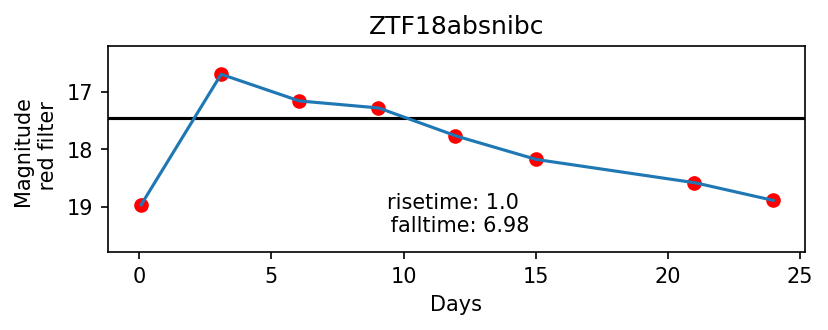

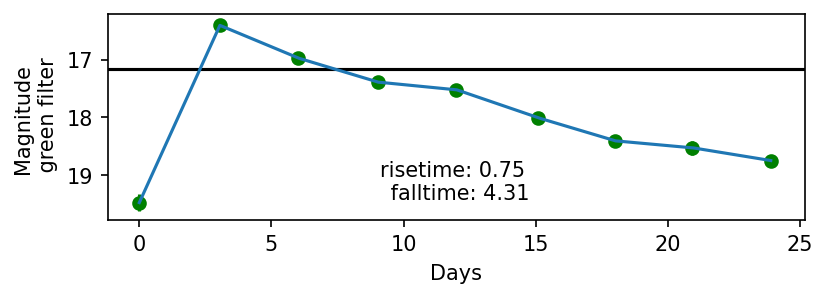

In [61]:
# red filter for CV 15

plotname = CV_15

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 8
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18absnibc')


# green filter for CV 15
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [4]:
CV_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF19aayfhtc.csv")
ND_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF19aayfhtc.csv")
plotname = CV_16
non_detection = ND_16

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF19aayfhtc.csv'

In [ ]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.047907
halfmag 17.80048198915995
minmag 16.690971
halfmag 17.443545989159954


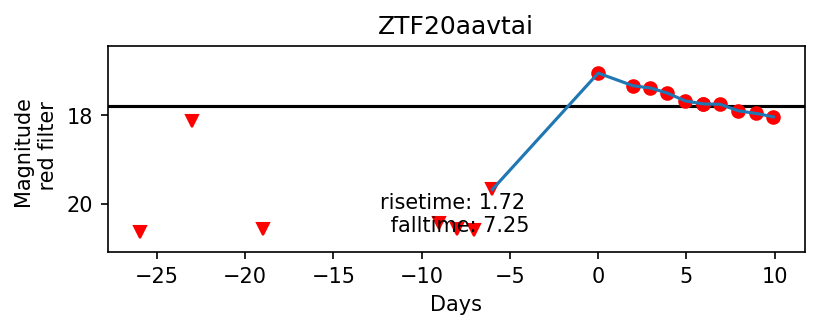

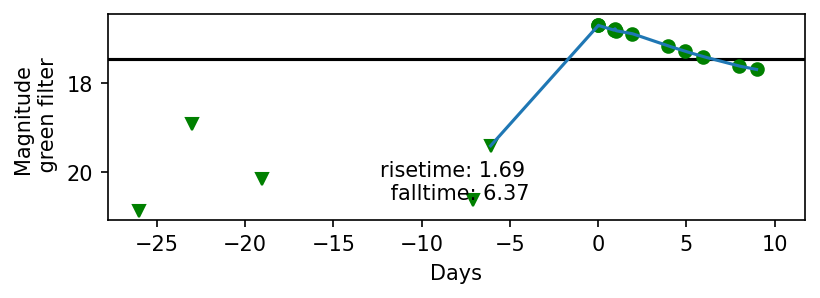

In [64]:
# red filter for CV 16

plotname = CV_16
non_detection = ND_16

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aavtai')



# green filter for transient 16
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [65]:
CV_17 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acaktuk_20220616\\detections_ZTF18acaktuk.csv")
plotname = CV_17

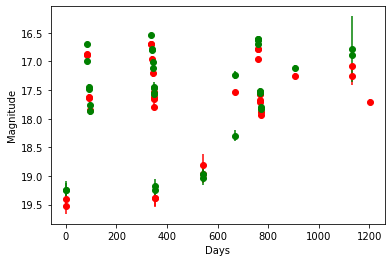

In [66]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.877876
halfmag 17.630450989159954
minmag 16.694736
halfmag 17.447310989159952


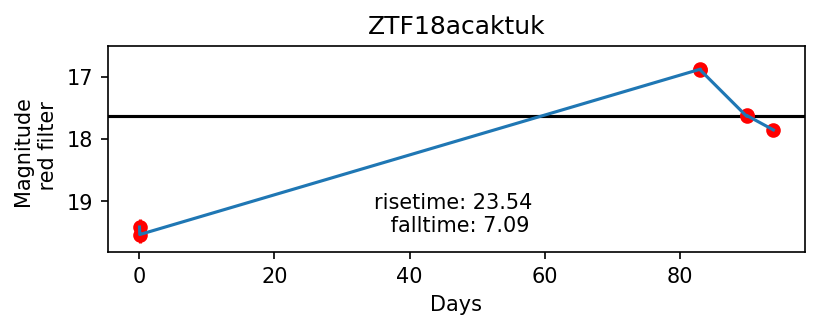

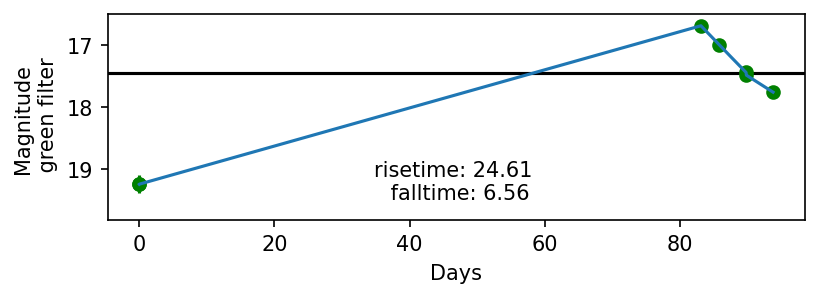

In [67]:
# red filter for CV 17

plotname = CV_17

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 7
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acaktuk')


# green filter for CV 17
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 7
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()


In [68]:
CV_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF20aavtaib.csv")
ND_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF20aavtaib.csv")
plotname = CV_18
non_detection = ND_18

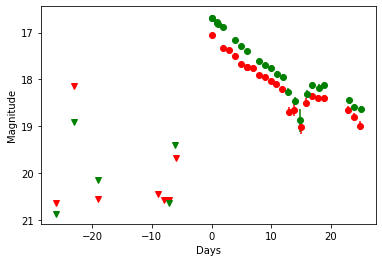

In [69]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.047907
halfmag 17.80048198915995
minmag 16.690971
halfmag 17.443545989159954


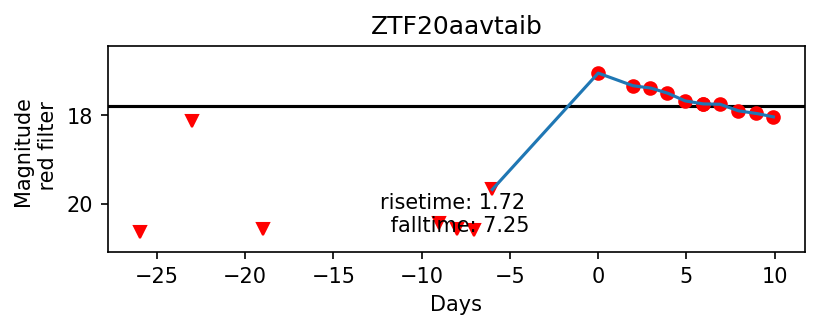

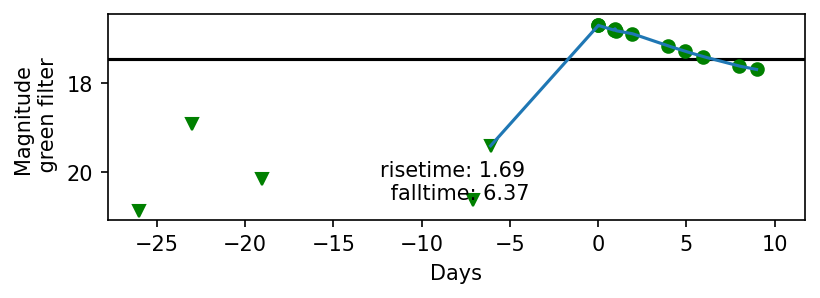

In [70]:
# red filter for CV 18

plotname = CV_18
non_detection = ND_18

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aavtaib')


# green filter for transient 1
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [71]:
CV_19= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\detections_ZTF21acgrero.csv")
ND_19 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\non_detections_ZTF21acgrero.csv")
plotname = CV_19
non_detection = ND_19

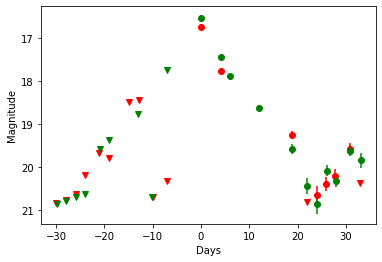

In [72]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.749512
halfmag 17.502086989159952
minmag 16.522879
halfmag 17.275453989159953


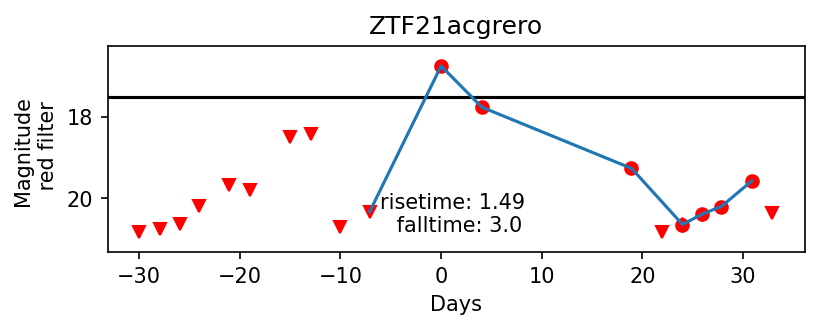

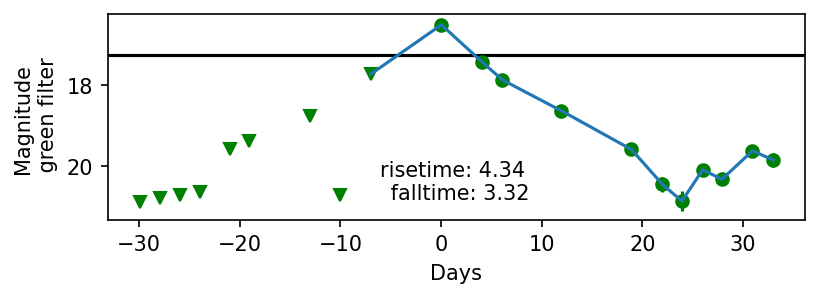

In [73]:
# red filter for CV 19

plotname = CV_19
non_detection = ND_19

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acgrero')


# green filter for transient 19
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [74]:
CV_20= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\detections_ZTF18abrxrms.csv")
ND_20 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\non_detections_ZTF18abrxrms.csv")
plotname = CV_20
non_detection = ND_20

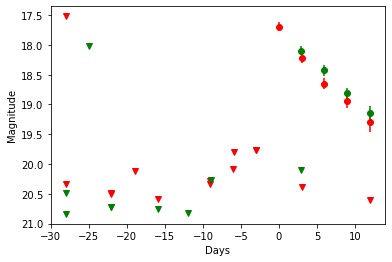

In [75]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.69212
halfmag 18.444694989159952
minmag 18.09533
halfmag 18.847904989159954


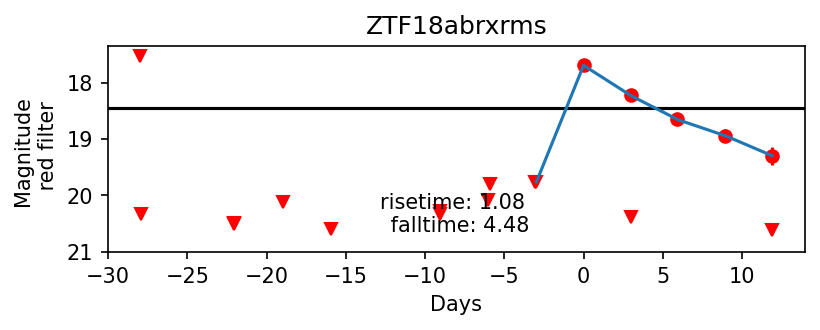

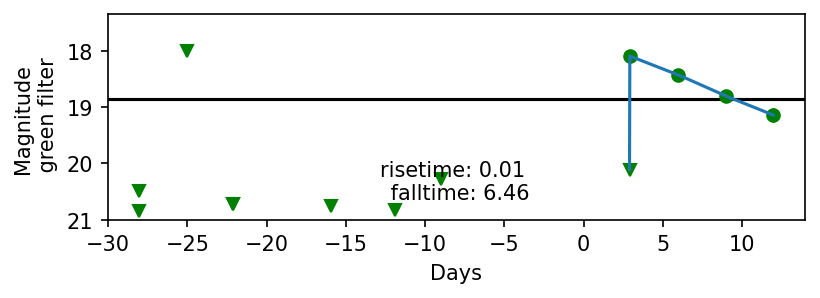

In [76]:
# red filter for CV 20

plotname = CV_20
non_detection = ND_20

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abrxrms')


# green filter for transient 20
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()